In [1]:
from pathways.scenarios import run_scenarios, load_scenario_table
from pathways.simulation import load_configuration
from pathways.outputs import save_scenario_result_to_pandas

In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from pathlib import Path
datadir = Path("tests/test_summaries")
basic_config = load_configuration(datadir / "config.yml")
scenario_table = load_scenario_table(datadir / "scenarios_config.csv")

In [4]:
results = run_scenarios(
    config=basic_config,
    scenario_table=scenario_table,
    seed=42,
    num_simulations=2,
    num_consignments=10,
)

Running scenario: clustered_10
Running scenario: clustered_12
Running scenario: clustered_14
Running scenario: clustered_16
Running scenario: clustered_09
Running scenario: clustered_11
Running scenario: clustered_13
Running scenario: clustered_15
Running scenario: clustered_02
Running scenario: clustered_04
Running scenario: clustered_06
Running scenario: clustered_08
Running scenario: clustered_01
Running scenario: clustered_03
Running scenario: clustered_05
Running scenario: clustered_07
Running scenario: clustered_35
Running scenario: clustered_36
Running scenario: clustered_39
Running scenario: clustered_40
Running scenario: clustered_43
Running scenario: clustered_44
Running scenario: clustered_47
Running scenario: clustered_48
Running scenario: clustered_34
Running scenario: clustered_38
Running scenario: clustered_42
Running scenario: clustered_46
Running scenario: clustered_33
Running scenario: clustered_37
Running scenario: clustered_41
Running scenario: clustered_45
Running 

In [5]:
df = save_scenario_result_to_pandas(
    results,
    config_columns=[
        "name",
        "consignment_name",
        "inspection_name",
        "consignment/boxes/min",
        "consignment/boxes/max",
        "consignment/items_per_box/default",
        "contamination/contamination_rate/parameters",
        "contamination/arrangement",
        "inspection/unit",
        "inspection/sample_strategy",
        "inspection/proportion/value",
        "inspection/hypergeometric/detection_level",
        "inspection/selection_strategy",
        "inspection/within_box_pct",
        "inspection/cluster/cluster_selection",
    ],
    result_columns=[
        "missing",
        "true_contamination_rate",
        "max_missed_contamination_rate",
        "avg_missed_contamination_rate",
        "max_intercepted_contamination_rate",
        "avg_intercepted_contamination_rate",
        "avg_boxes_opened_completion",
        "avg_boxes_opened_detection",
        "avg_items_inspected_completion",
        "avg_items_inspected_detection",
        "pct_items_inspected_detection",
        "pct_contaminant_unreported_if_detection",
    ],
)

In [6]:
df['consignment_name'] = pd.Categorical(df['consignment_name'])
consignment_order = ["contamination_5", "contamination_10", "contamination_25", "small", "large", "maritime", "clustered", "clustered_small", "clustered_large"]
df['consignment_name'] = df['consignment_name'].cat.reorder_categories(consignment_order, ordered=True)
df

name consignment_name                        inspection_name  \
0    clustered_10        clustered       boxes 0.01 hypergeometric random   
1    clustered_12        clustered       boxes 0.05 hypergeometric random   
2    clustered_14        clustered        boxes 0.1 hypergeometric random   
3    clustered_16        clustered       boxes 0.25 hypergeometric random   
4    clustered_09        clustered  boxes 0.01 hypergeometric convenience   
..            ...              ...                                    ...   
427      small_30            small                       items 25% random   
428      small_17            small                   items 2% convenience   
429      small_21            small                   items 5% convenience   
430      small_25            small                  items 10% convenience   
431      small_29            small                  items 25% convenience   

     consignment/boxes/min  consignment/boxes/max  \
0                        5                     25   
1                        5                     25   
2                        5                     25   
3                        5                     25   
4                        5                     25   
..                     ...                    ...   
427                      1                      3   
428                      1                      3   
429                      1                      3   
430                      1                      3   
431                      1                      3   

     consignment/items_per_box/default  \
0                                  200   
1                                  200   
2                                  200   
3                                  200   
4                                  200   
..                                 ...   
427                                200   
428                                200   
429                                200   
430                                200   
431                                200   

    contamination/contamination_rate/parameters contamination/arrangement  \
0                                       [1, 80]                 clustered   
1                                       [1, 80]                 clustered   
2                                       [1, 80]                 clustered   
3                                       [1, 80]                 clustered   
4                                       [1, 80]                 clustered   
..                                          ...                       ...   
427                                     [1, 80]                    random   
428                                     [1, 80]                    random   
429                                     [1, 80]                    random   
430                                     [1, 80]                    random   
431                                     [1, 80]                    random   

    inspection/unit inspection/sample_strategy  ...  \
0               box             hypergeometric  ...   
1               box             hypergeometric  ...   
2               box             hypergeometric  ...   
3               box             hypergeometric  ...   
4               box             hypergeometric  ...   
..              ...                        ...  ...   
427            item                 proportion  ...   
428            item                 proportion  ...   
429            item                 proportion  ...   
430            item                 proportion  ...   
431            item                 proportion  ...   

     max_missed_contamination_rate avg_missed_contamination_rate  \
0                              NaN                           NaN   
1                              NaN                           NaN   
2                         0.039524                      0.020088   
3                         0.017928                      0.009038   
4                   

<AxesSubplot:xlabel='inspection_name'>

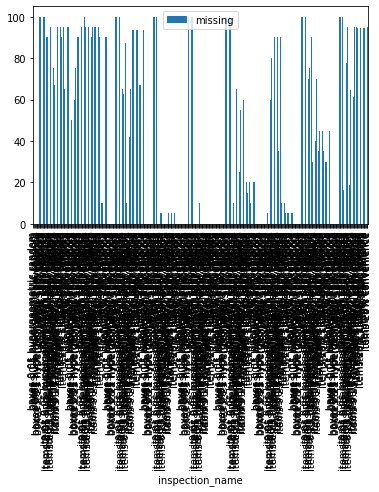

In [7]:
df.plot(kind="bar", x="inspection_name", y="missing")

In [8]:
#df["consignment"] = df.apply(lambda row: re.sub("_[0-9]+$", "", row["name"]), axis = 1)

<AxesSubplot:xlabel='consignment_name'>

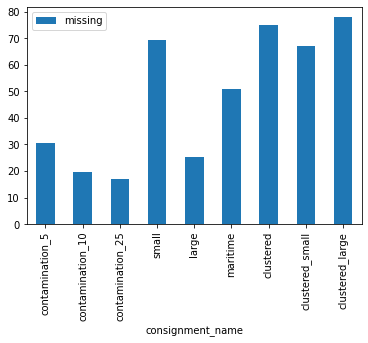

In [9]:
df.groupby("consignment_name").agg({"missing": "mean"}).reset_index().plot(kind="bar", x="consignment_name", y="missing")

Text(0.5, 1.0, 'Avg percent contaminated consignments missed by inspection')

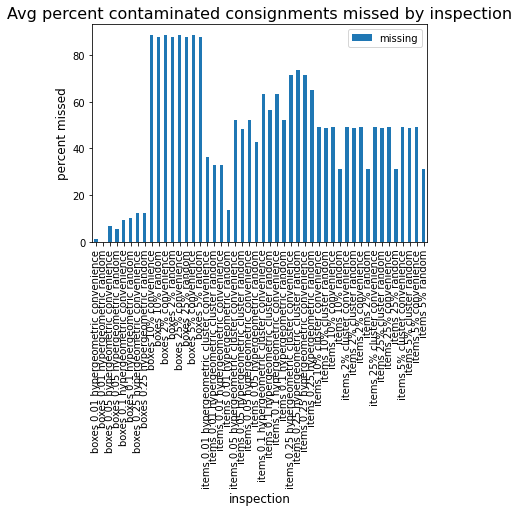

In [10]:
df.groupby("inspection_name").agg({"missing": "mean"}).reset_index().plot(kind="bar", x="inspection_name", y="missing")
plt.xlabel("inspection", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Avg percent contaminated consignments missed by inspection", size=16)

In [11]:
inspections_vs_consignments = df.pivot_table(index=["inspection_name"], columns=["consignment_name"], values=["missing"])
inspections_vs_consignments

missing  \
consignment_name                              contamination_5   
inspection_name                                                 
boxes 0.01 hypergeometric convenience                     0.0   
boxes 0.01 hypergeometric random                          0.0   
boxes 0.05 hypergeometric convenience                     0.0   
boxes 0.05 hypergeometric random                          0.0   
boxes 0.1 hypergeometric convenience                      0.0   
boxes 0.1 hypergeometric random                           0.0   
boxes 0.25 hypergeometric convenience                     0.0   
boxes 0.25 hypergeometric random                          0.0   
boxes 10% convenience                                   100.0   
boxes 10% random                                        100.0   
boxes 2% convenience                                    100.0   
boxes 2% random                                         100.0   
boxes 25% convenience                                   100.0   
boxes 25% random                                        100.0   
boxes 5% convenience                                    100.0   
boxes 5% random                                         100.0   
items 0.01 hypergeometric cluster convenience             0.0   
items 0.01 hypergeometric cluster random                  0.0   
items 0.01 hypergeometric convenience                     0.0   
items 0.01 hypergeometric random                          0.0   
items 0.05 hypergeometric cluster convenience             5.0   
items 0.05 hypergeometric cluster random                 10.0   
items 0.05 hypergeometric convenience                     5.0   
items 0.05 hypergeometric random                         10.0   
items 0.1 hypergeometric cluster convenience             40.0   
items 0.1 hypergeometric cluster random                  30.0   
items 0.1 hypergeometric convenience                     40.0   
items 0.1 hypergeometric random                          25.0   
items 0.25 hypergeometric cluster convenience            60.0   
items 0.25 hypergeometric cluster random                 65.0   
items 0.25 hypergeometric convenience                    60.0   
items 0.25 hypergeometric random                         55.0   
items 10% cluster convenience                            20.0   
items 10% cluster random                                 15.0   
items 10% convenience                                    20.0   
items 10% random                                         10.0   
items 2% cluster convenience                             20.0   
items 2% cluster random                                  15.0   
items 2% convenience                                     20.0   
items 2% random                                          10.0   
items 25% cluster convenience                            20.0   
items 25% cluster random                                 15.0   
items 25% convenience                                    20.0   
items 25% random                                         10.0   
items 5% cluster convenience                             20.0   
items 5% cluster random                                  15.0   
items 5% convenience                                     20.0   
items 5% random                                          10.0   

                                                                \
consignment_name                              contamination_10   
inspection_name                                                  
boxes 0.01 hypergeometric convenience                      0.0   
boxes 0.01 hypergeometric random                           0.0   
boxes 0.05 hypergeometric convenience                      0.0   
boxes 0.05 hypergeometric random                           0.0   
boxes 0.1 hypergeometric convenience                       0.0   
boxes 0.1 hypergeometric random                            0.0   
boxes 0.25 hypergeometric convenience                      0.0   
boxes 0.25 hypergeometric random                           0.0   
boxes 10% co

<AxesSubplot:xlabel='inspection_name'>

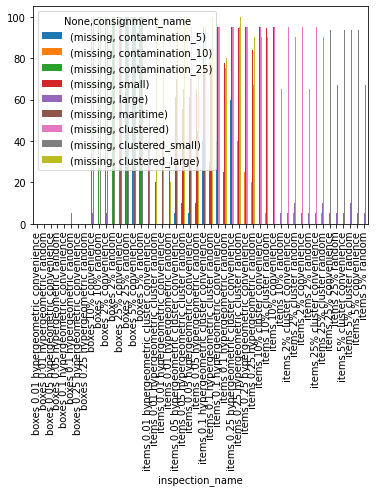

In [12]:
inspections_vs_consignments.plot(kind="bar")

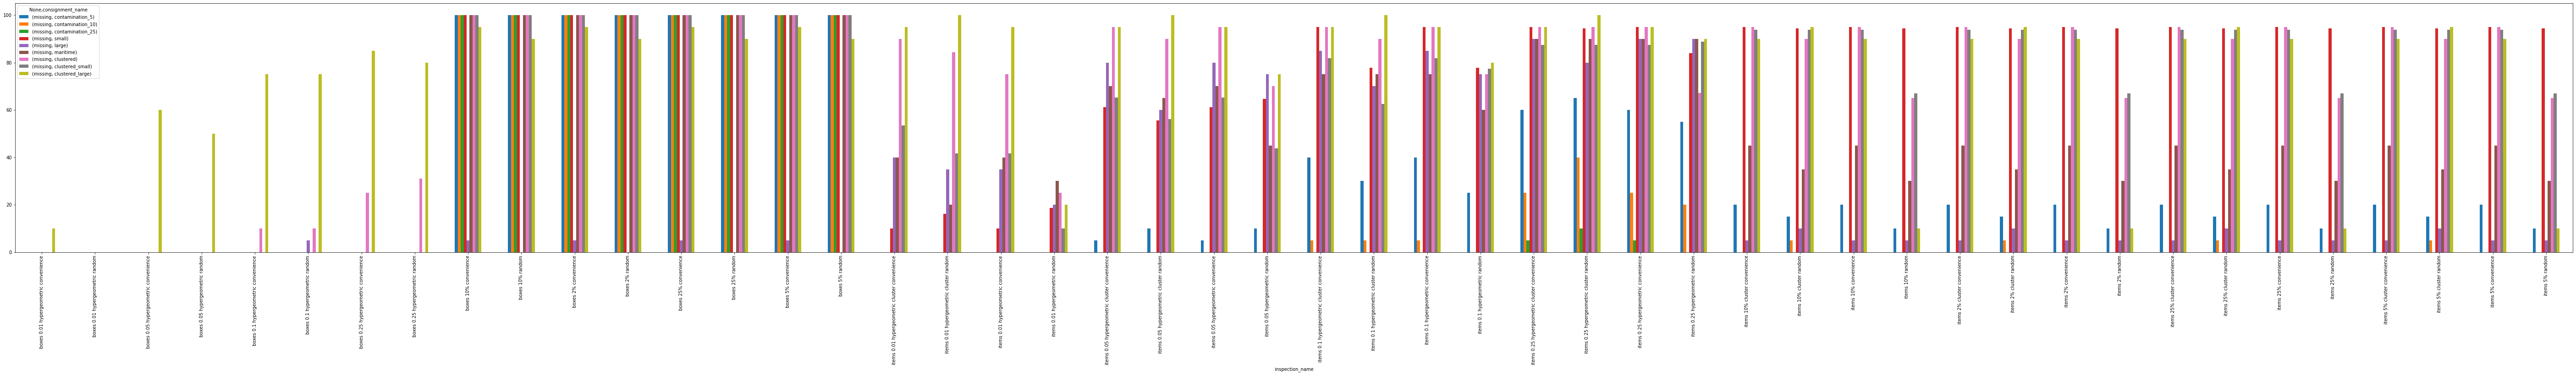

In [13]:
ax = inspections_vs_consignments.plot(kind="bar", figsize=(100, 10))
#ax.figure.savefig("inspections_vs_consignments_bar.png")

In [14]:
from itertools import cycle, islice

it = cycle(list(range(1,49)))
df['inspection_num'] = list(islice(it, len(df)))

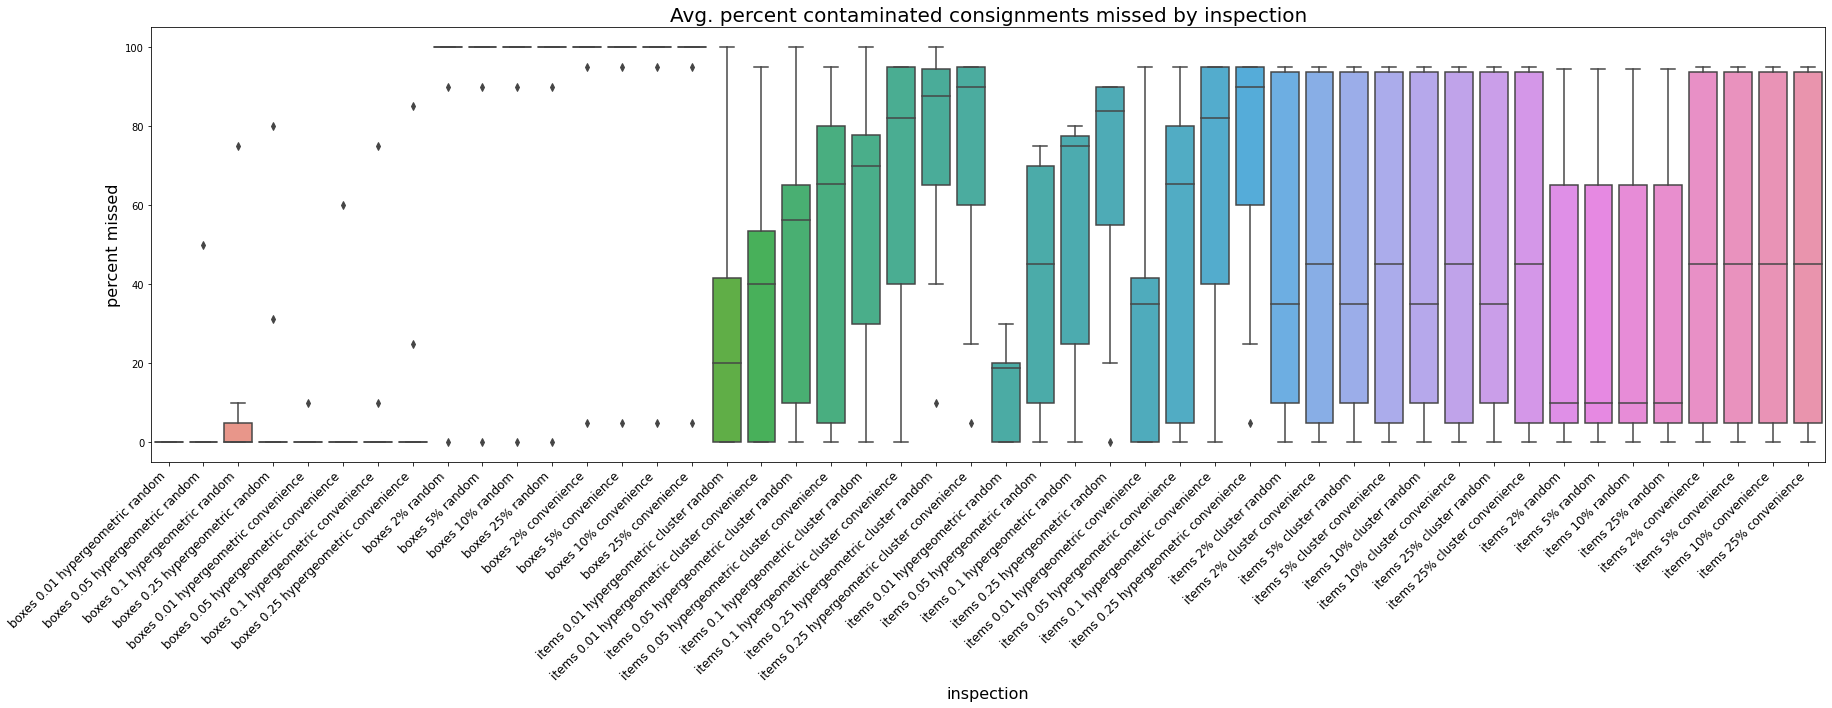

In [15]:
plt.figure(figsize=(30, 8))
sns.boxplot(x="inspection_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("inspection", size=16)
plt.ylabel("percent missed", size=16)
plt.title("Avg. percent contaminated consignments missed by inspection", size=20)
plt.savefig("missed_by_inspection_boxplot.png", bbox_inches = "tight")

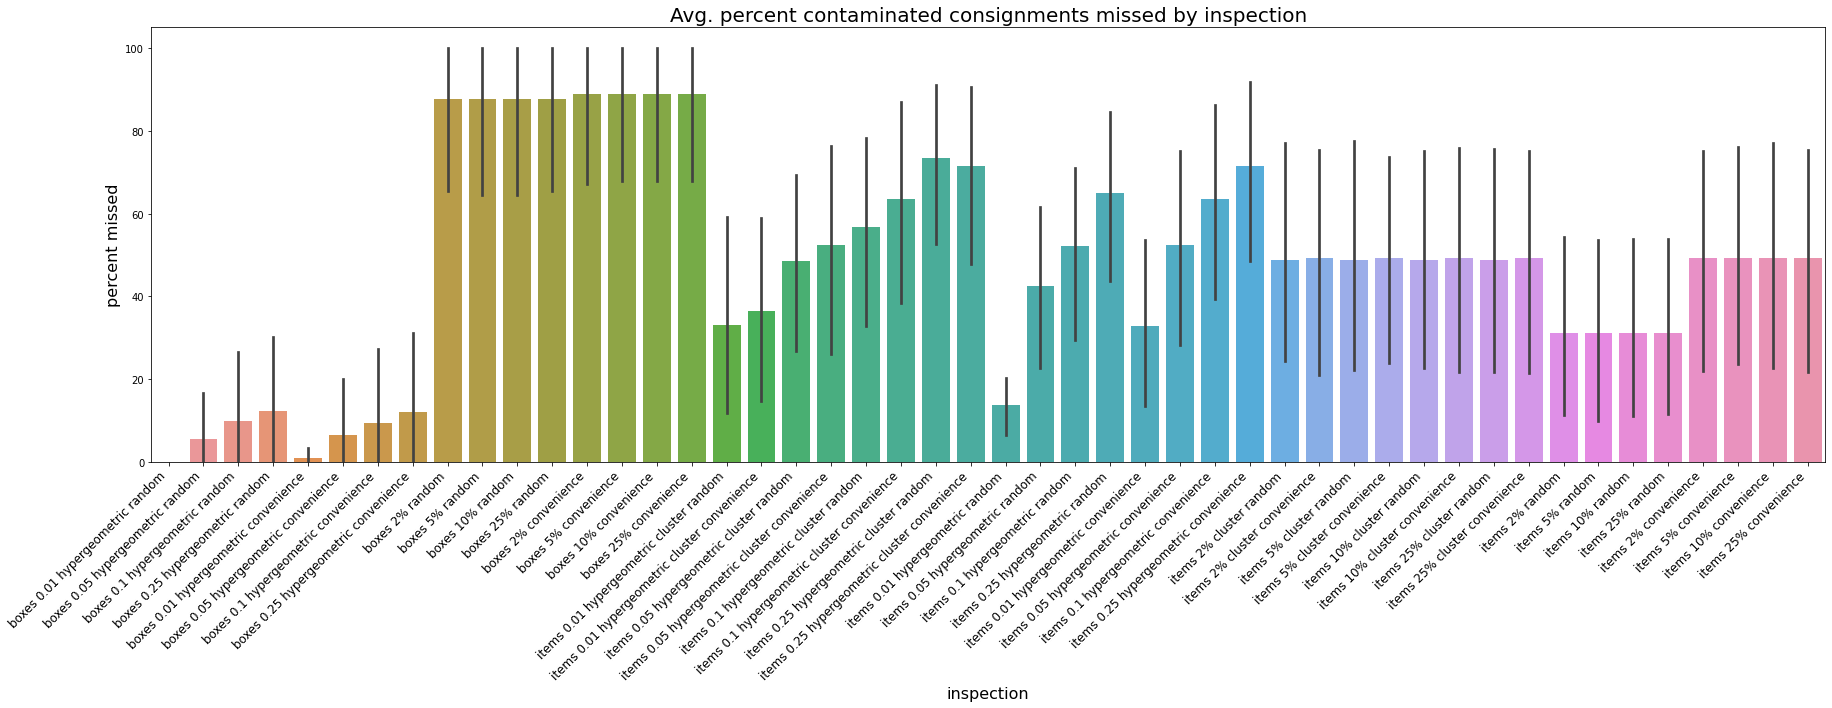

In [16]:
plt.figure(figsize=(30, 8))
sns.barplot(x="inspection_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("inspection", size=16)
plt.ylabel("percent missed", size=16)
plt.title("Avg. percent contaminated consignments missed by inspection", size=20)
plt.savefig("missed_by_inspection.png", bbox_inches = "tight")

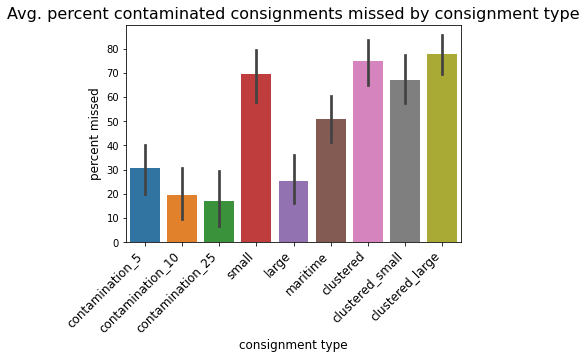

In [17]:
sns.barplot(x="consignment_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("consignment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Avg. percent contaminated consignments missed by consignment type", size=16)
plt.savefig("missed_by_consignment.png", bbox_inches = "tight")

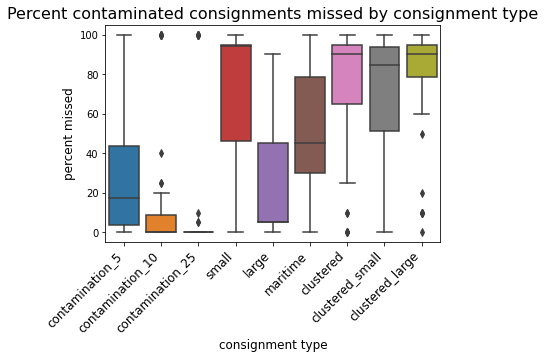

In [18]:
sns.boxplot(x="consignment_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("consignment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent contaminated consignments missed by consignment type", size=16)
plt.savefig("missed_by_inspection_boxplot.png", bbox_inches = "tight")

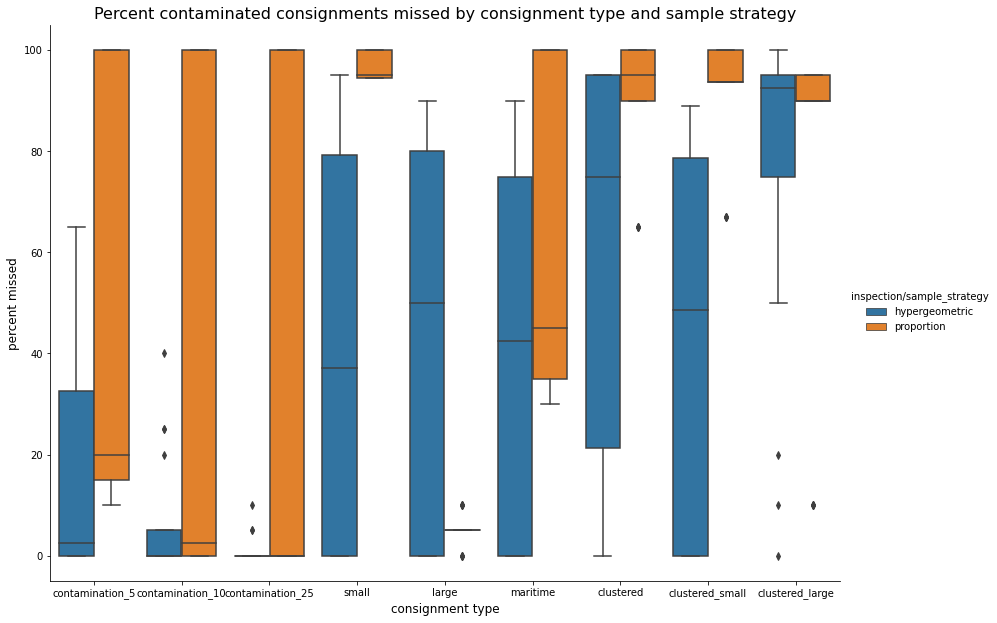

In [19]:
sns.catplot(x="consignment_name", y="missing", hue="inspection/sample_strategy", kind="box", data=df, height=8.27, aspect=11.7/8.27)
plt.xlabel("consignment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent contaminated consignments missed by consignment type and sample strategy", size=16)
plt.savefig("missed_by_consignment_sample_strategy.png", bbox_inches = "tight")

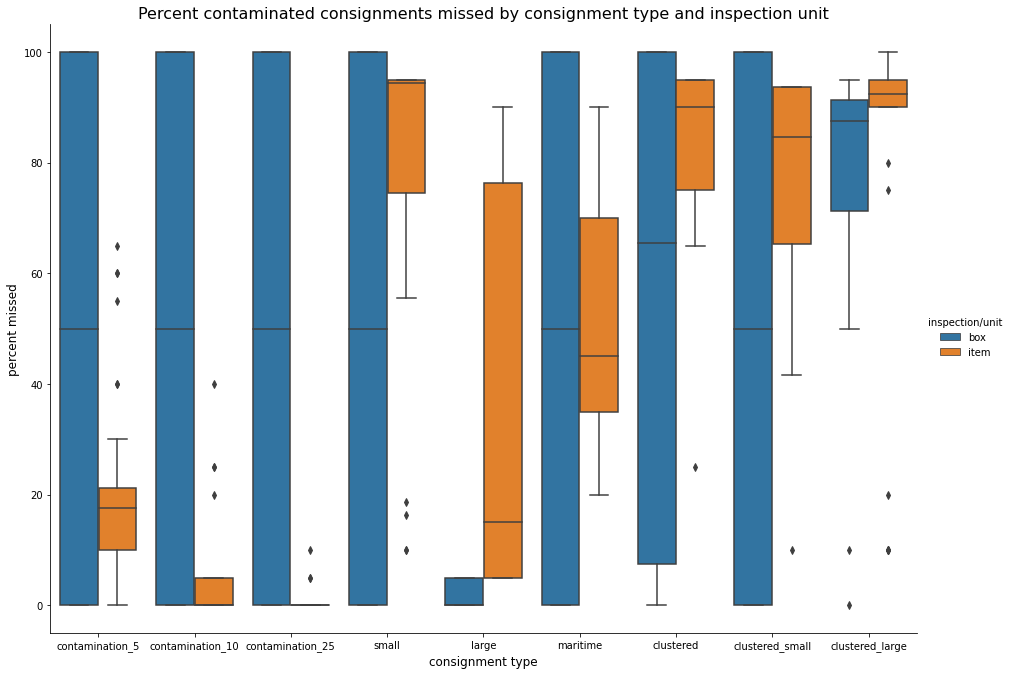

In [20]:
sns.catplot(x="consignment_name", y="missing", hue="inspection/unit", kind="box", data=df, height=9, aspect=11.7/8.27)
plt.xlabel("consignment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent contaminated consignments missed by consignment type and inspection unit", size=16)
plt.savefig("missed_by_consignment_unit.png", bbox_inches = "tight")

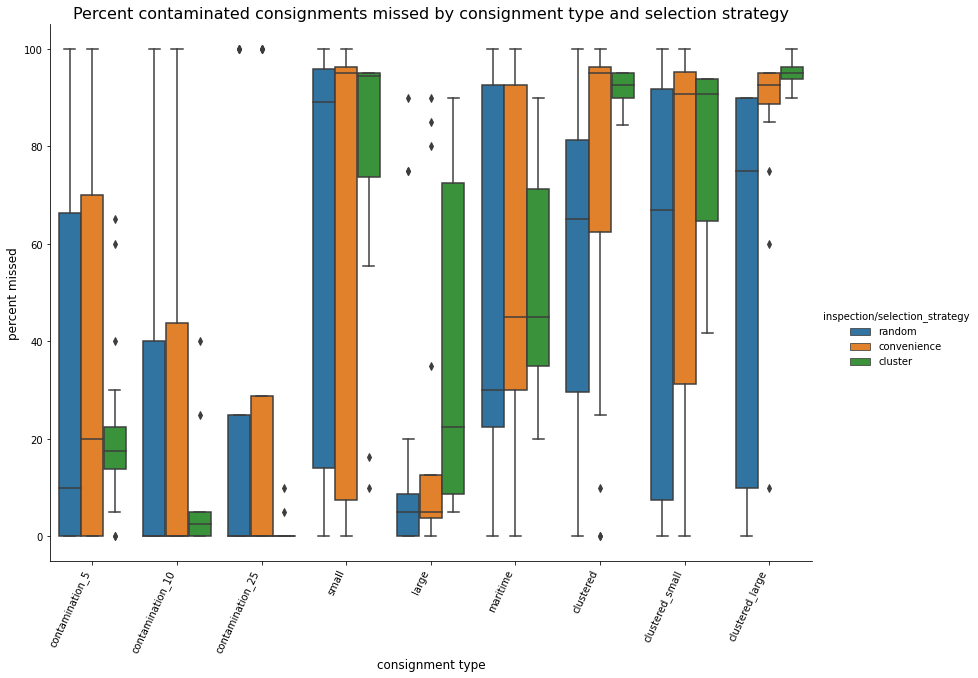

In [21]:
chart = sns.catplot(x="consignment_name", y="missing", hue="inspection/selection_strategy", aspect=11.7/8.27,
            kind="box", data=df, height=8)
chart.set_xticklabels(rotation=65, horizontalalignment='right')
plt.xlabel("consignment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent contaminated consignments missed by consignment type and selection strategy", size=16)
chart.savefig("missed_by_consignment_selection.png", bbox_inches = "tight")

In [22]:
inspections_vs_consignments

missing  \
consignment_name                              contamination_5   
inspection_name                                                 
boxes 0.01 hypergeometric convenience                     0.0   
boxes 0.01 hypergeometric random                          0.0   
boxes 0.05 hypergeometric convenience                     0.0   
boxes 0.05 hypergeometric random                          0.0   
boxes 0.1 hypergeometric convenience                      0.0   
boxes 0.1 hypergeometric random                           0.0   
boxes 0.25 hypergeometric convenience                     0.0   
boxes 0.25 hypergeometric random                          0.0   
boxes 10% convenience                                   100.0   
boxes 10% random                                        100.0   
boxes 2% convenience                                    100.0   
boxes 2% random                                         100.0   
boxes 25% convenience                                   100.0   
boxes 25% random                                        100.0   
boxes 5% convenience                                    100.0   
boxes 5% random                                         100.0   
items 0.01 hypergeometric cluster convenience             0.0   
items 0.01 hypergeometric cluster random                  0.0   
items 0.01 hypergeometric convenience                     0.0   
items 0.01 hypergeometric random                          0.0   
items 0.05 hypergeometric cluster convenience             5.0   
items 0.05 hypergeometric cluster random                 10.0   
items 0.05 hypergeometric convenience                     5.0   
items 0.05 hypergeometric random                         10.0   
items 0.1 hypergeometric cluster convenience             40.0   
items 0.1 hypergeometric cluster random                  30.0   
items 0.1 hypergeometric convenience                     40.0   
items 0.1 hypergeometric random                          25.0   
items 0.25 hypergeometric cluster convenience            60.0   
items 0.25 hypergeometric cluster random                 65.0   
items 0.25 hypergeometric convenience                    60.0   
items 0.25 hypergeometric random                         55.0   
items 10% cluster convenience                            20.0   
items 10% cluster random                                 15.0   
items 10% convenience                                    20.0   
items 10% random                                         10.0   
items 2% cluster convenience                             20.0   
items 2% cluster random                                  15.0   
items 2% convenience                                     20.0   
items 2% random                                          10.0   
items 25% cluster convenience                            20.0   
items 25% cluster random                                 15.0   
items 25% convenience                                    20.0   
items 25% random                                         10.0   
items 5% cluster convenience                             20.0   
items 5% cluster random                                  15.0   
items 5% convenience                                     20.0   
items 5% random                                          10.0   

                                                                \
consignment_name                              contamination_10   
inspection_name                                                  
boxes 0.01 hypergeometric convenience                      0.0   
boxes 0.01 hypergeometric random                           0.0   
boxes 0.05 hypergeometric convenience                      0.0   
boxes 0.05 hypergeometric random                           0.0   
boxes 0.1 hypergeometric convenience                       0.0   
boxes 0.1 hypergeometric random                            0.0   
boxes 0.25 hypergeometric convenience                      0.0   
boxes 0.25 hypergeometric random                           0.0   
boxes 10% co

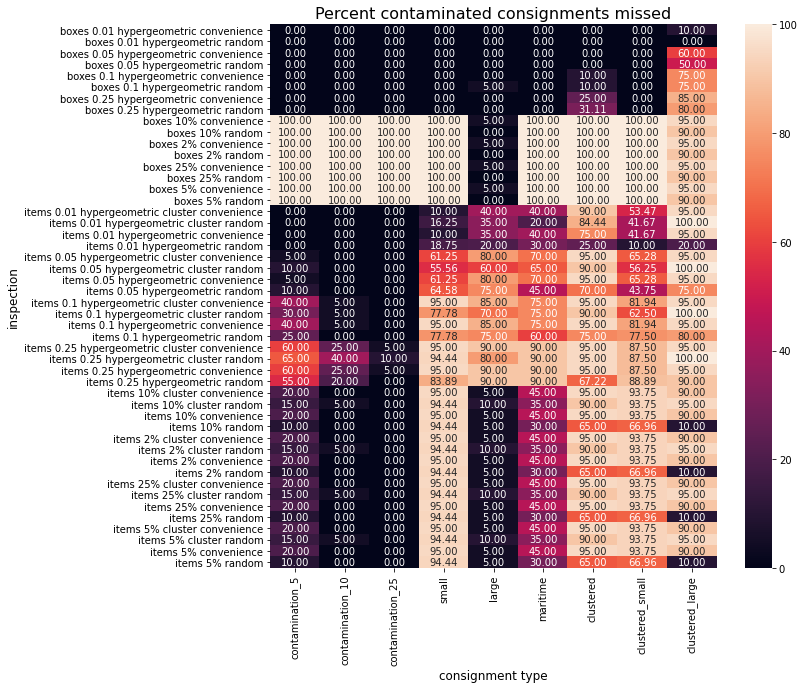

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_consignments, annot=True, fmt=".2f", xticklabels = consignment_order)
plt.xlabel("consignment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Percent contaminated consignments missed", size=16)
plt.savefig("heatmap_missed.png", bbox_inches = "tight")

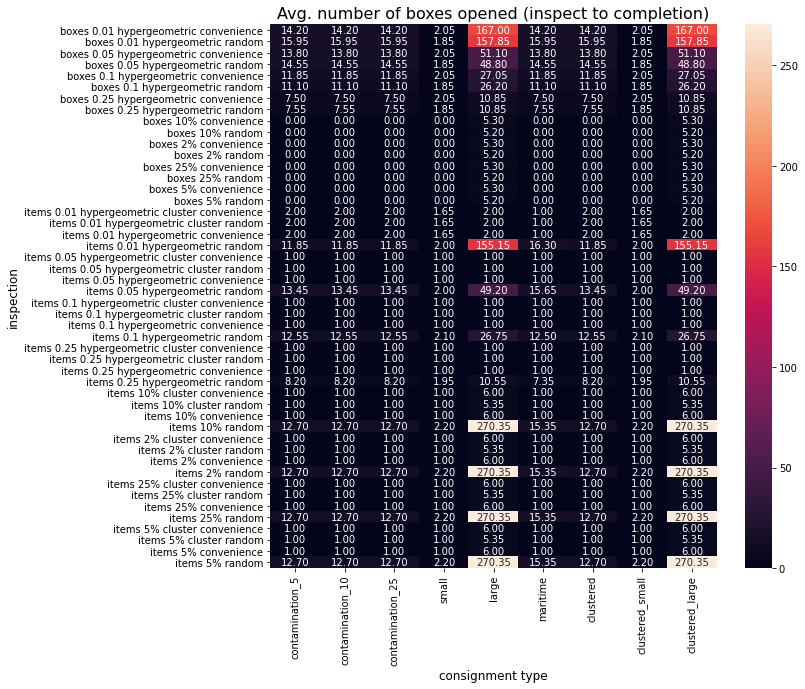

In [24]:
inspections_vs_consignments_boxes_opened = df.pivot_table(index=["inspection_name"], columns=["consignment_name"], values=["avg_boxes_opened_completion"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_consignments_boxes_opened, annot=True, fmt=".2f", xticklabels = consignment_order)
plt.xlabel("consignment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of boxes opened (inspect to completion)", size=16)
plt.savefig("heatmap_boxes_completion.png", bbox_inches = "tight")

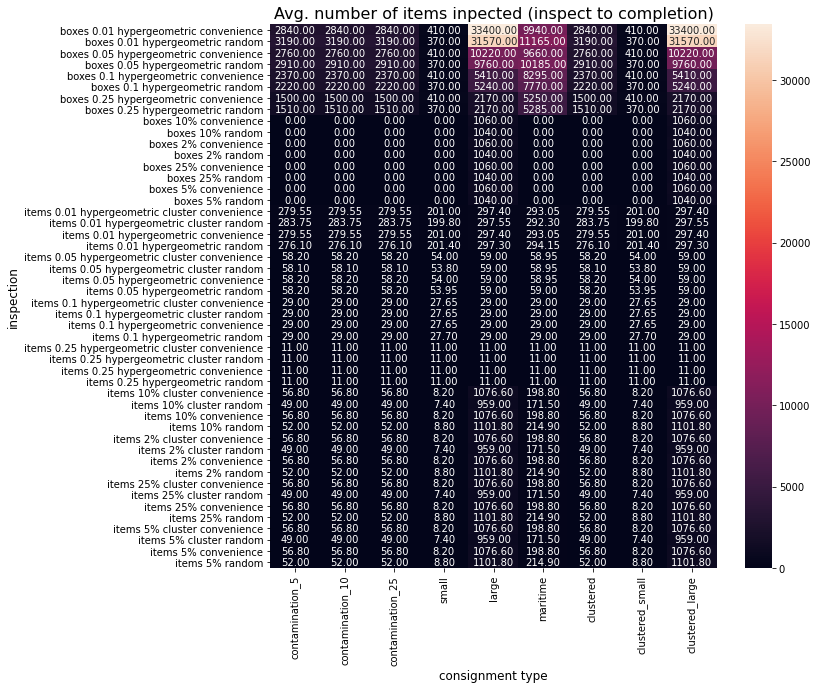

In [25]:
inspections_vs_consignments_items_inspected = df.pivot_table(index=["inspection_name"], columns=["consignment_name"], values=["avg_items_inspected_completion"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_consignments_items_inspected, annot=True, fmt=".2f", xticklabels = consignment_order)
plt.xlabel("consignment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of items inpected (inspect to completion)", size=16)
plt.savefig("heatmap_items_completion.png", bbox_inches = "tight")

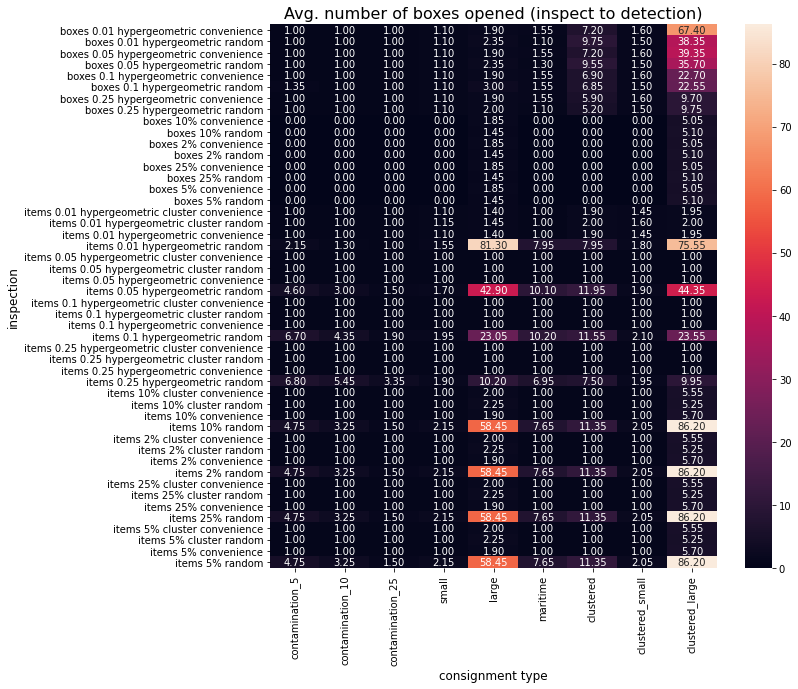

In [26]:
inspections_vs_consignments_boxes_opened_detection = df.pivot_table(index=["inspection_name"], columns=["consignment_name"], values=["avg_boxes_opened_detection"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_consignments_boxes_opened_detection, annot=True, fmt=".2f", xticklabels = consignment_order)
plt.xlabel("consignment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of boxes opened (inspect to detection)", size=16)
plt.savefig("heatmap_boxes_detection.png", bbox_inches = "tight")

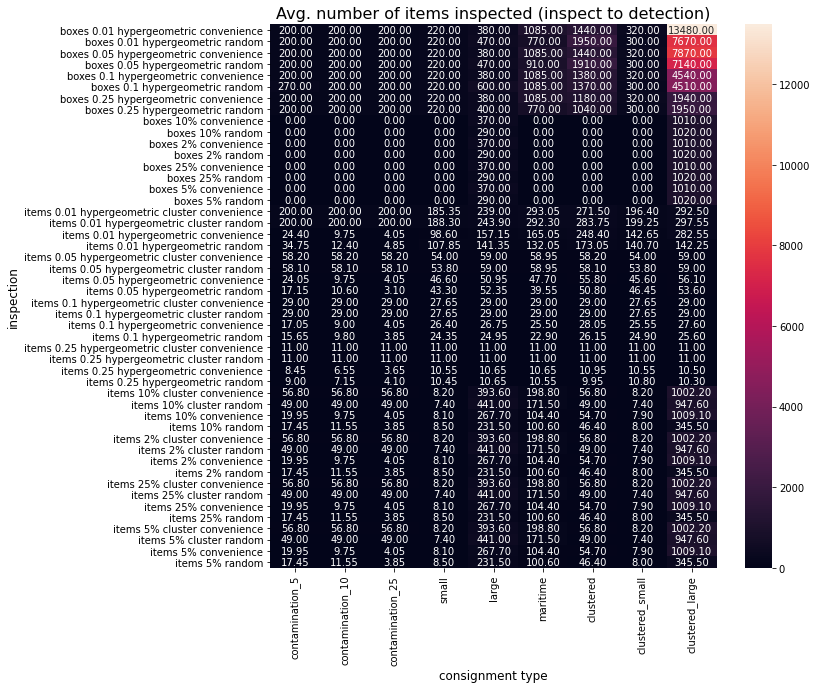

In [27]:
inspections_vs_consignments_items_inspected_detection = df.pivot_table(index=["inspection_name"], columns=["consignment_name"], values=["avg_items_inspected_detection"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_consignments_items_inspected_detection, annot=True, fmt=".2f", xticklabels = consignment_order)
plt.xlabel("consignment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of items inspected (inspect to detection)", size=16)
plt.savefig("heatmap_items_detection.png", bbox_inches = "tight")

In [28]:
df_norm = df[["missing",
        "true_contamination_rate",
        "max_intercepted_contamination_rate",
        "avg_intercepted_contamination_rate",
        "avg_boxes_opened_completion",
        "avg_boxes_opened_detection",
        "avg_items_inspected_completion",
        "avg_items_inspected_detection",
        "pct_items_inspected_detection",
        "pct_contaminant_unreported_if_detection"]]
df_norm

missing  true_contamination_rate  max_intercepted_contamination_rate  \
0     0.000000                 0.008022                            0.016222   
1     0.000000                 0.012357                            0.044500   
2    10.000000                 0.013338                            0.044982   
3    31.111111                 0.012761                            0.046427   
4     0.000000                 0.006674                            0.016188   
..         ...                      ...                                 ...   
427  94.444444                 0.006542                            0.018333   
428  95.000000                 0.012000                            0.025000   
429  95.000000                 0.012000                            0.025000   
430  95.000000                 0.012000                            0.025000   
431  95.000000                 0.012000                            0.025000   

     avg_intercepted_contamination_rate  avg_boxes_opened_completion  \
0                              0.008407                        15.95   
1                              0.013070                        14.55   
2                              0.012461                        11.10   
3                              0.014406                         7.55   
4                              0.006674                        14.20   
..                                  ...                          ...   
427                            0.018333                         2.20   
428                            0.025000                         1.00   
429                            0.025000                         1.00   
430                            0.025000                         1.00   
431                            0.025000                         1.00   

     avg_boxes_opened_detection  avg_items_inspected_completion  \
0                          9.75                          3190.0   
1                          9.55                          2910.0   
2                          6.85                          2220.0   
3                          5.20                          1510.0   
4                          7.20                          2840.0   
..                          ...                             ...   
427                        2.15                             8.8   
428                        1.00                             8.2   
429                        1.00                             8.2   
430                        1.00                             8.2   
431                        1.00                             8.2   

     avg_items_inspected_detection  pct_items_inspected_detection  \
0                           1950.0                      61.187780   
1                           1910.0                      63.907044   
2                           1370.0                      53.660050   
3                           1040.0                      38.708791   
4                           1440.0                      50.500629   
..                             ...                            ...   
427                            8.5                       1.928571   
428                            8.1                       1.975000   
429                            8.1                       1.975000   
430                            8.1                       1.975000   
431                            8.1                       1.975000   

     pct_contaminant_unreported_if_detection  
0                                   0.000000  
1                                  22.371365  
2                                   4.567901  
3                                   0.000000  
4                                   0.000000  
..                                       ...  
427                                 0.000000  
428                                 0.000000  
429                                 0.000000  
430                                 0.000000  
431                                 0.0000

In [29]:
df_norm=(df_norm-df_norm.min())/(df_norm.max()-df_norm.min())
df_norm

missing  true_contamination_rate  max_intercepted_contamination_rate  \
0    0.000000                 0.005900                            0.038405   
1    0.000000                 0.023178                            0.135185   
2    0.100000                 0.027090                            0.136835   
3    0.311111                 0.024791                            0.141780   
4    0.000000                 0.000528                            0.038288   
..        ...                      ...                                 ...   
427  0.944444                 0.000000                            0.045632   
428  0.950000                 0.021756                            0.068448   
429  0.950000                 0.021756                            0.068448   
430  0.950000                 0.021756                            0.068448   
431  0.950000                 0.021756                            0.068448   

     avg_intercepted_contamination_rate  avg_boxes_opened_completion  \
0                              0.018330                     0.058998   
1                              0.036582                     0.053819   
2                              0.034202                     0.041058   
3                              0.041813                     0.027927   
4                              0.011548                     0.052525   
..                                  ...                          ...   
427                            0.057186                     0.008138   
428                            0.083281                     0.003699   
429                            0.083281                     0.003699   
430                            0.083281                     0.003699   
431                            0.083281                     0.003699   

     avg_boxes_opened_detection  avg_items_inspected_completion  \
0                      0.113109                        0.095509   
1                      0.110789                        0.087126   
2                      0.079466                        0.066467   
3                      0.060325                        0.045210   
4                      0.083527                        0.085030   
..                          ...                             ...   
427                    0.024942                        0.000263   
428                    0.011601                        0.000246   
429                    0.011601                        0.000246   
430                    0.011601                        0.000246   
431                    0.011601                        0.000246   

     avg_items_inspected_detection  pct_items_inspected_detection  \
0                         0.144659                       0.752742   
1                         0.141691                       0.786195   
2                         0.101632                       0.660134   
3                         0.077151                       0.476202   
4                         0.106825                       0.621267   
..                             ...                            ...   
427                       0.000631                       0.023726   
428                       0.000601                       0.024297   
429                       0.000601                       0.024297   
430                       0.000601                       0.024297   
431                       0.000601                       0.024297   

     pct_contaminant_unreported_if_detection  
0                                   0.000000  
1                                   0.225238  
2                                   0.045990  
3                                   0.000000  
4                                   0.000000  
..                                       ...  
427                                 0.000000  
428                                 0.000000  
429                                 0.000000  
430                                 0.000000  
431                                 0.000000  

[432 

In [30]:
df_norm["name"], df_norm["inspection_num"], df_norm["inspection_name"], df_norm["consignment_name"] = df["name"], df["inspection_num"], df["inspection_name"], df["consignment_name"]
df_norm

missing  true_contamination_rate  max_intercepted_contamination_rate  \
0    0.000000                 0.005900                            0.038405   
1    0.000000                 0.023178                            0.135185   
2    0.100000                 0.027090                            0.136835   
3    0.311111                 0.024791                            0.141780   
4    0.000000                 0.000528                            0.038288   
..        ...                      ...                                 ...   
427  0.944444                 0.000000                            0.045632   
428  0.950000                 0.021756                            0.068448   
429  0.950000                 0.021756                            0.068448   
430  0.950000                 0.021756                            0.068448   
431  0.950000                 0.021756                            0.068448   

     avg_intercepted_contamination_rate  avg_boxes_opened_completion  \
0                              0.018330                     0.058998   
1                              0.036582                     0.053819   
2                              0.034202                     0.041058   
3                              0.041813                     0.027927   
4                              0.011548                     0.052525   
..                                  ...                          ...   
427                            0.057186                     0.008138   
428                            0.083281                     0.003699   
429                            0.083281                     0.003699   
430                            0.083281                     0.003699   
431                            0.083281                     0.003699   

     avg_boxes_opened_detection  avg_items_inspected_completion  \
0                      0.113109                        0.095509   
1                      0.110789                        0.087126   
2                      0.079466                        0.066467   
3                      0.060325                        0.045210   
4                      0.083527                        0.085030   
..                          ...                             ...   
427                    0.024942                        0.000263   
428                    0.011601                        0.000246   
429                    0.011601                        0.000246   
430                    0.011601                        0.000246   
431                    0.011601                        0.000246   

     avg_items_inspected_detection  pct_items_inspected_detection  \
0                         0.144659                       0.752742   
1                         0.141691                       0.786195   
2                         0.101632                       0.660134   
3                         0.077151                       0.476202   
4                         0.106825                       0.621267   
..                             ...                            ...   
427                       0.000631                       0.023726   
428                       0.000601                       0.024297   
429                       0.000601                       0.024297   
430                       0.000601                       0.024297   
431                       0.000601                       0.024297   

     pct_contaminant_unreported_if_detection          name  inspection_num  \
0                                   0.000000  clustered_10               1   
1                                   0.225238  clustered_12               2   
2                                   0.045990  clustered_14               3   
3                                   0.000000  clustered_16               4   
4                                   0.000000  clustered_09               5   
..                                       ...           ...             ...   
427                     

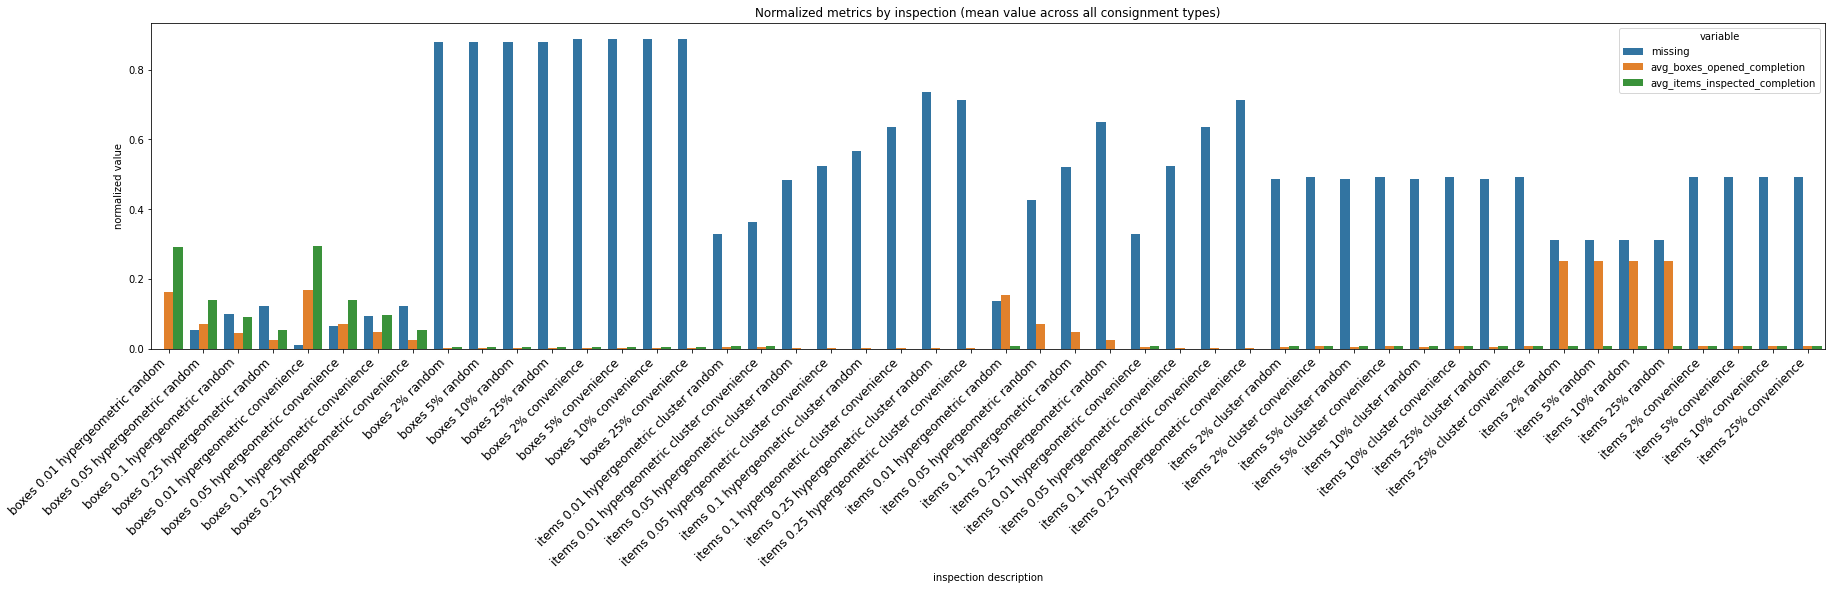

In [31]:
df_norm_melted = pd.melt(df_norm, id_vars=["inspection_num", "inspection_name", "consignment_name"], value_vars=["missing", "avg_boxes_opened_completion", "avg_items_inspected_completion"])
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted, ax=ax1, ci = None)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (mean value across all consignment types)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_all.png", bbox_inches = "tight")

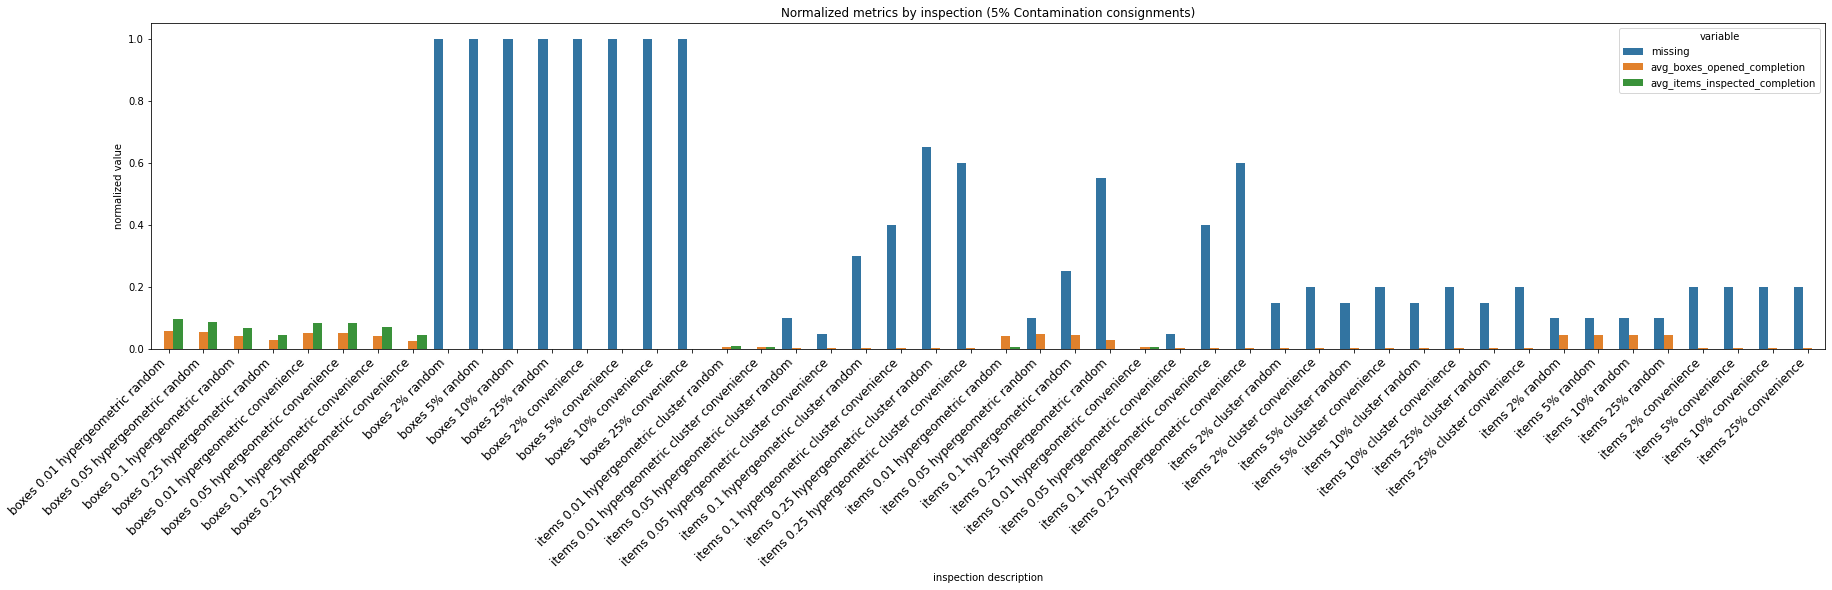

In [32]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("contamination_5")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (5% Contamination consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_contamination_5.png", bbox_inches = "tight")

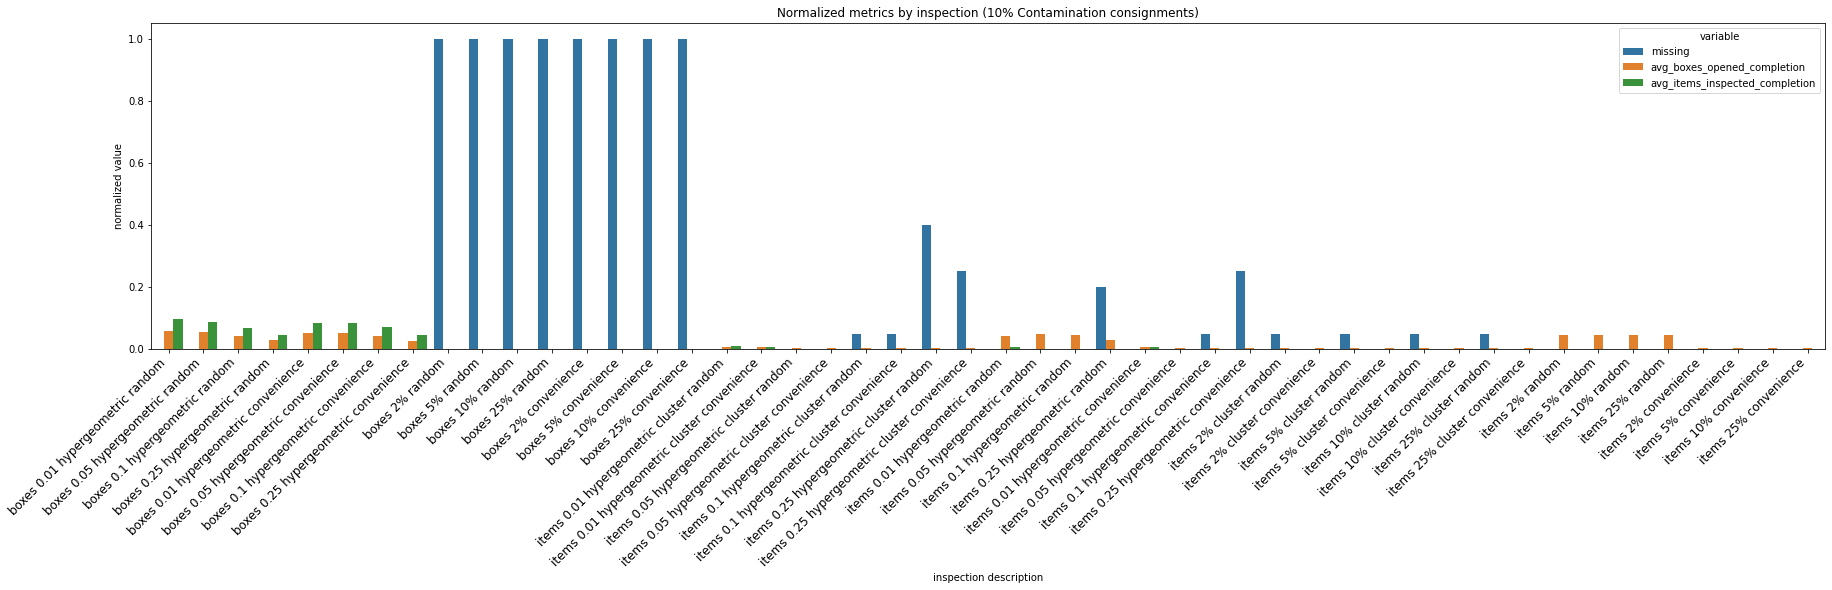

In [33]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("contamination_10")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (10% Contamination consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_contamination_10.png", bbox_inches = "tight")

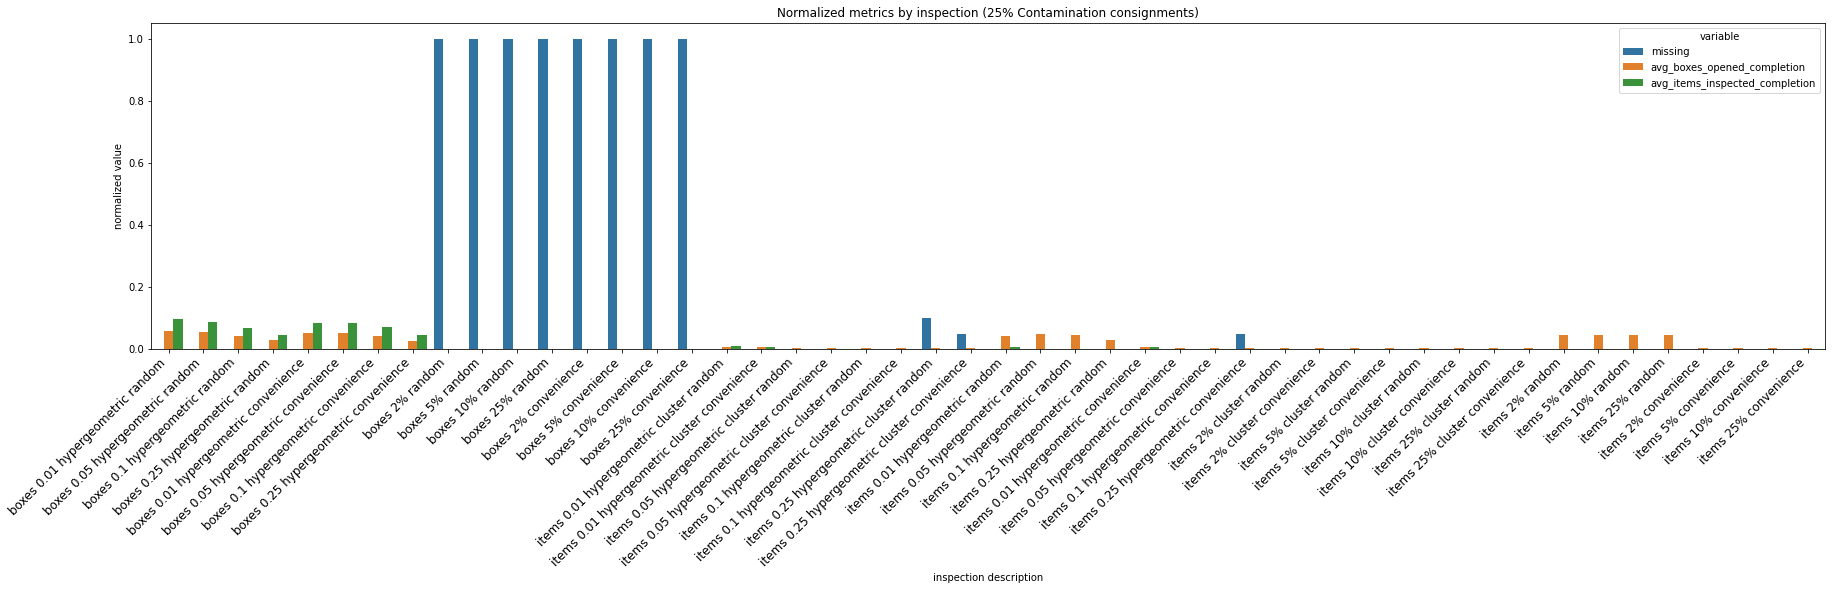

In [34]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("contamination_25")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (25% Contamination consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_contamination_25.png", bbox_inches = "tight")

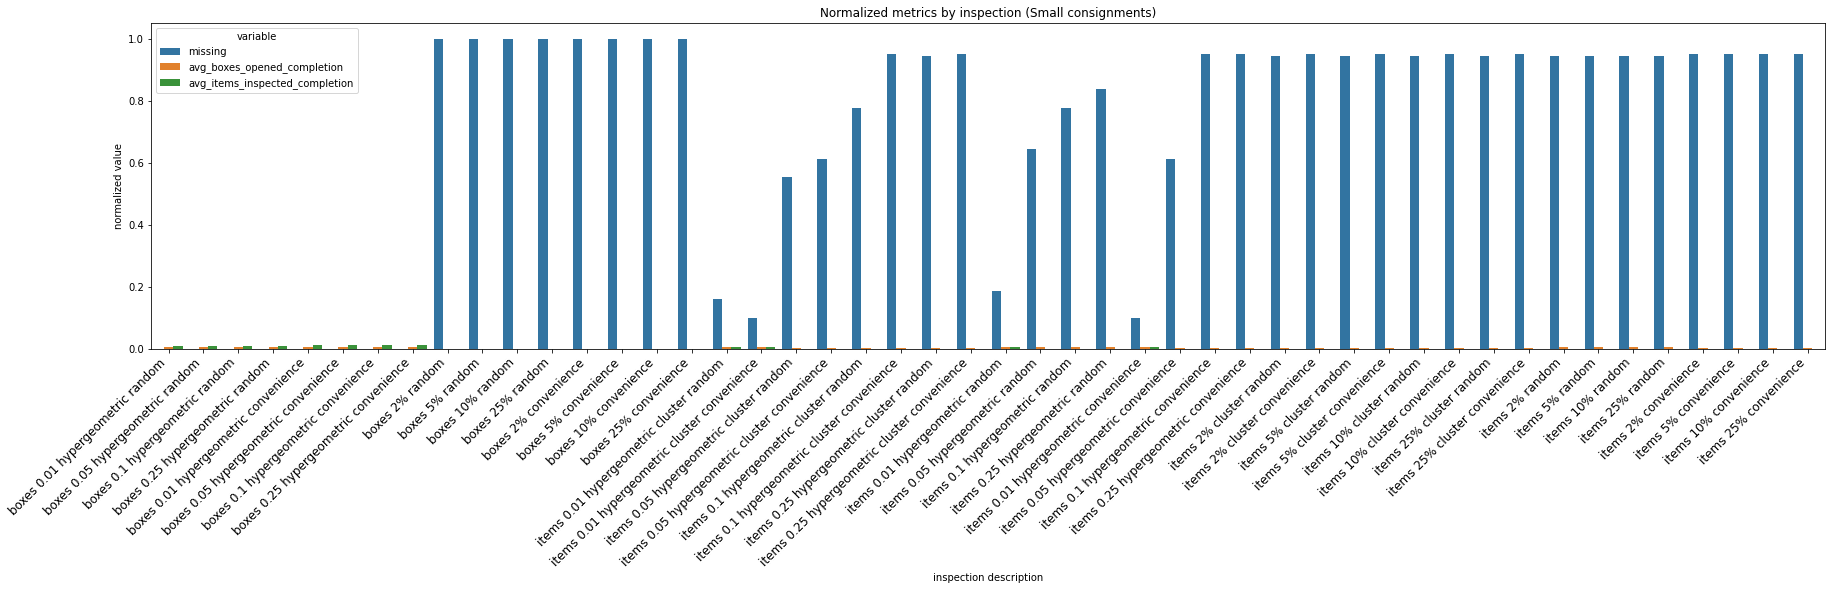

In [35]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("small")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Small consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_small.png", bbox_inches = "tight")

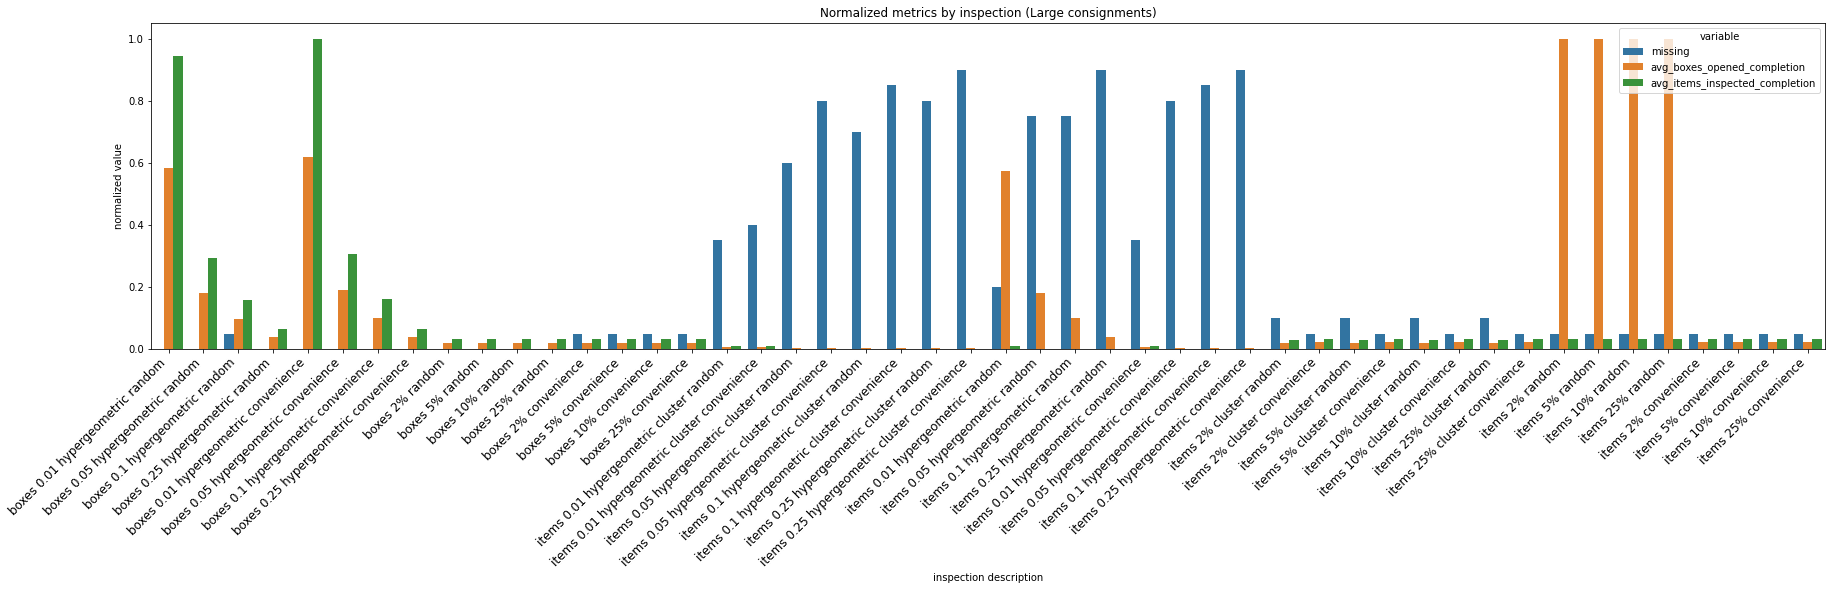

In [36]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("large")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Large consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_large.png", bbox_inches = "tight")

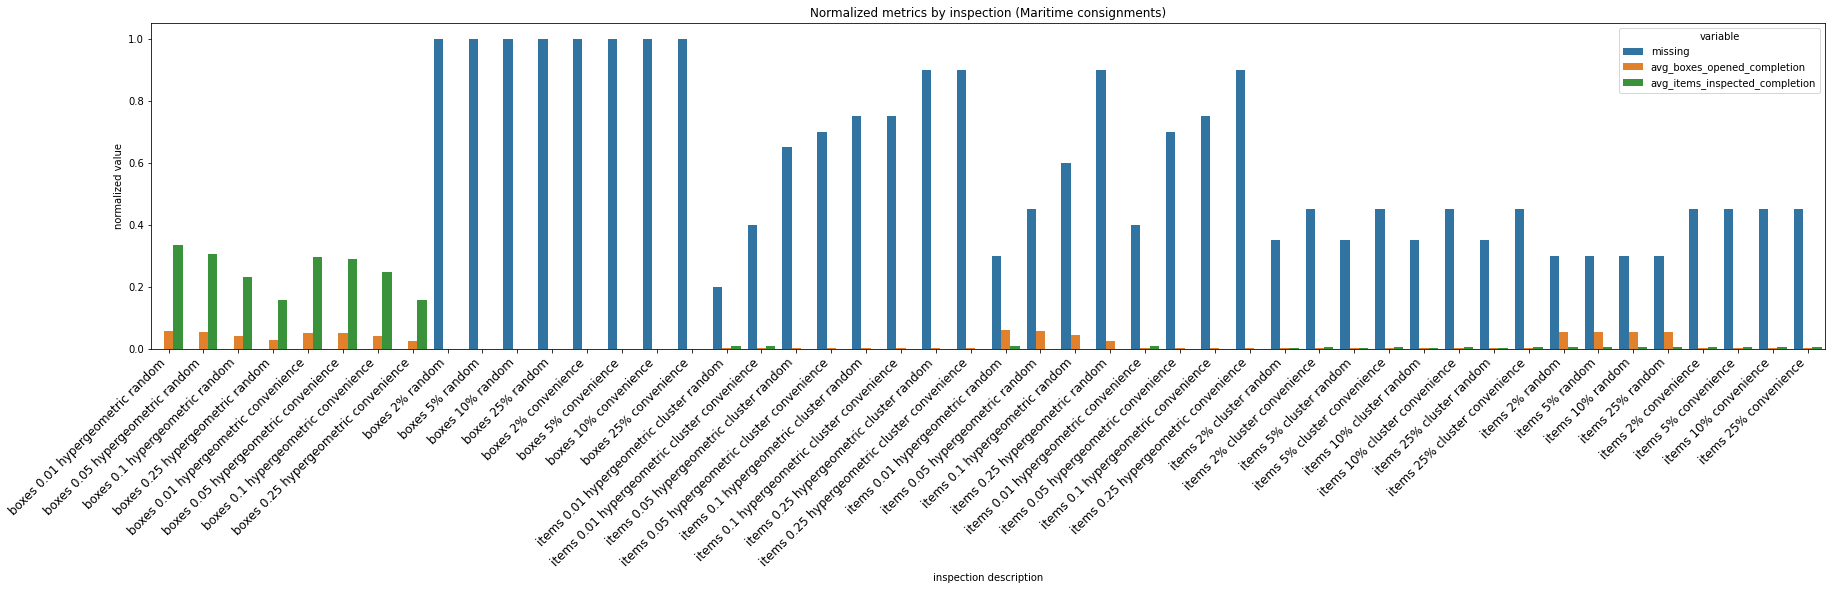

In [37]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("maritime")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Maritime consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_maritime.png", bbox_inches = "tight")

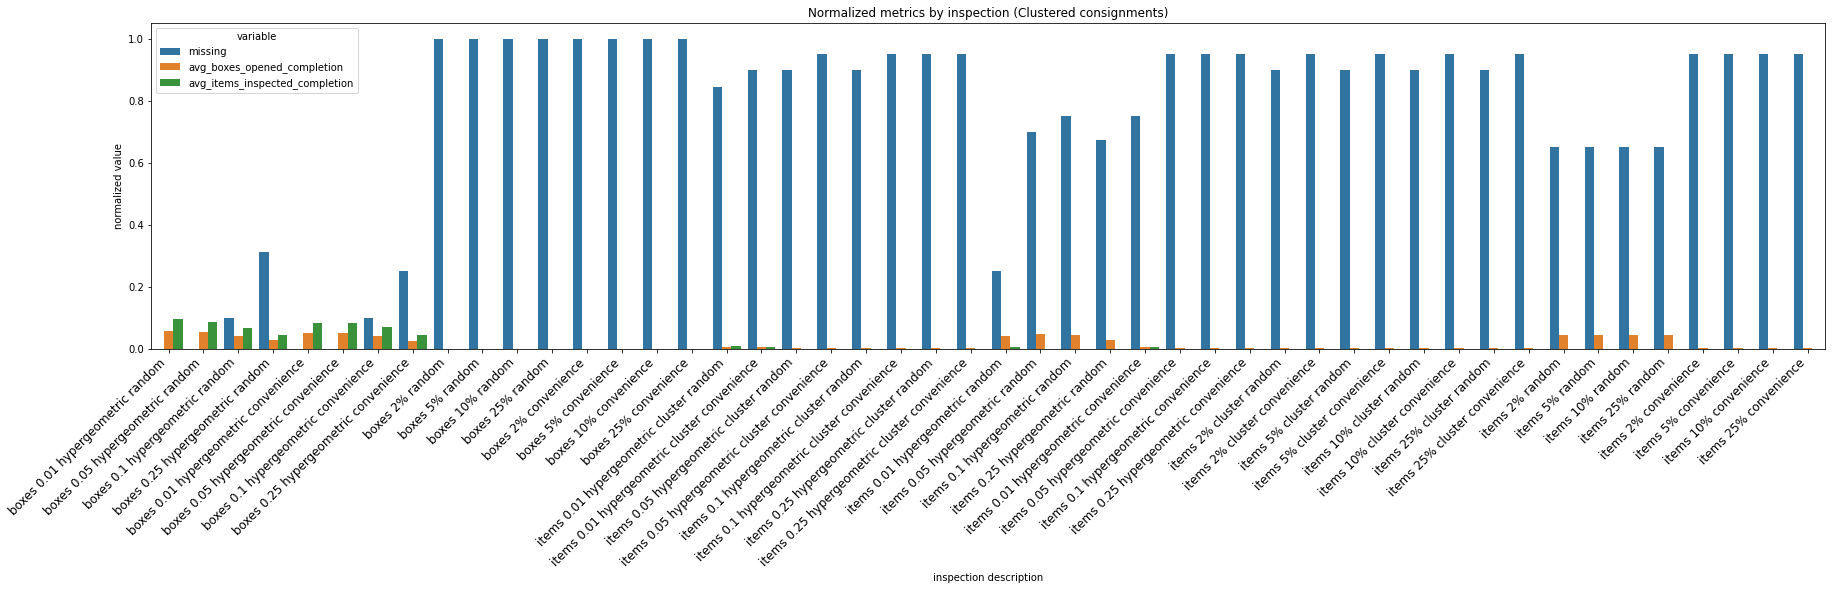

In [38]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("clustered")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Clustered consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_clustered.png", bbox_inches = "tight")

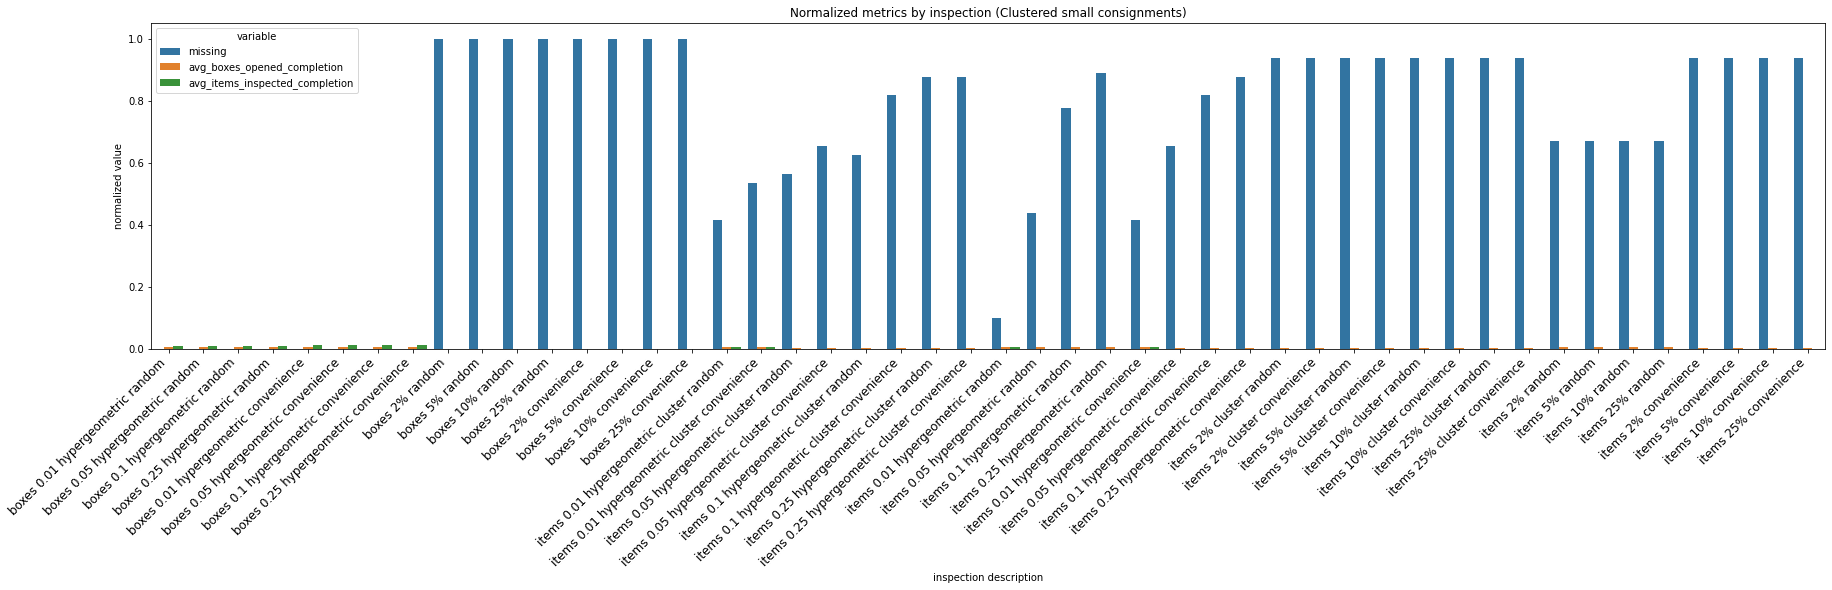

In [39]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("clustered_small")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Clustered small consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_clustered_small.png", bbox_inches = "tight")

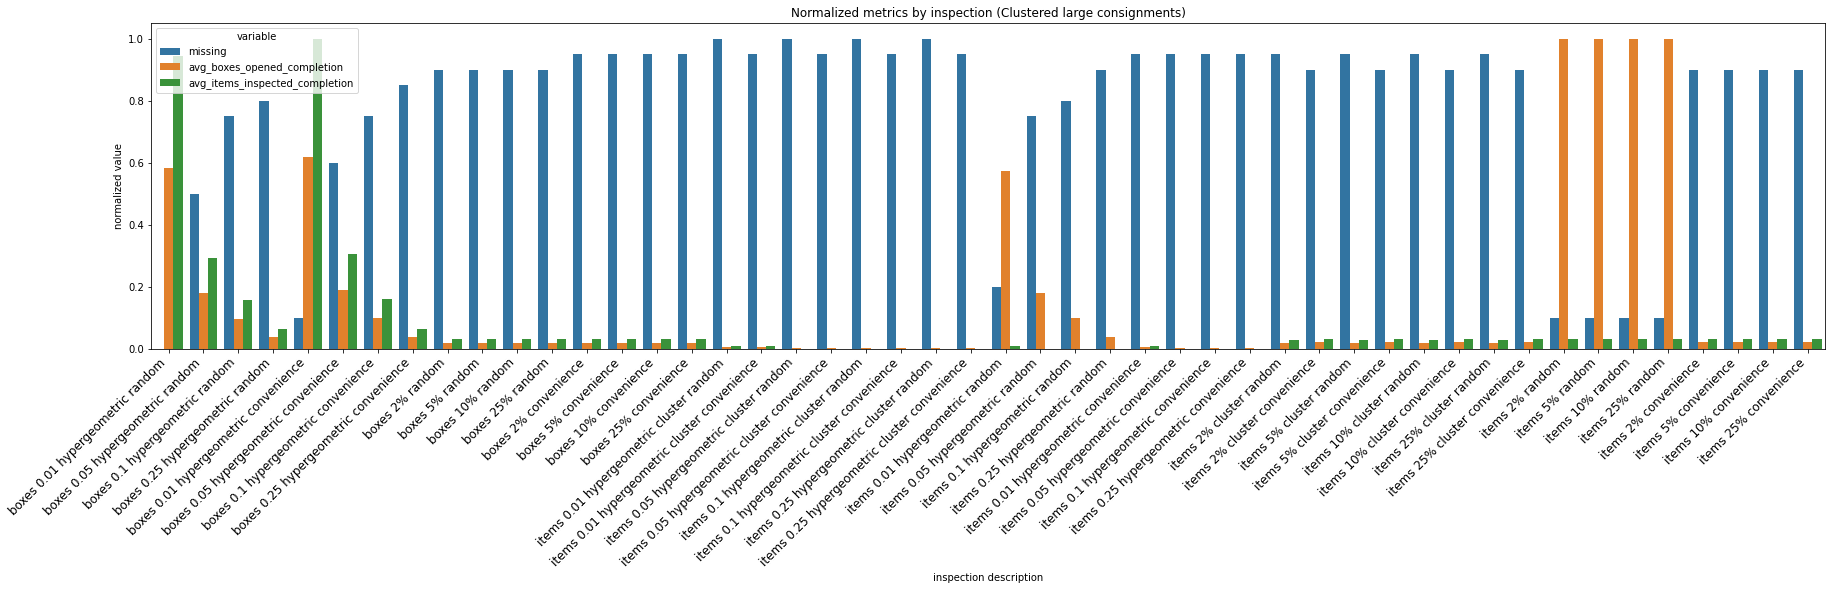

In [40]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("clustered_large")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Clustered large consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_clustered_large.png", bbox_inches = "tight")